中间件是一个用来处理Django的请求和响应的框架级别的钩子。它是一个轻量、低级别的插件系统，用于在全局范围内改变Django的输入和输出。每个中间件组件都负责做一些特定的功能。

但是由于其影响的是全局，所以需要谨慎使用，使用不当会影响性能。

说的直白一点中间件是帮助我们在视图函数执行之前和执行之后都可以做一些额外的操作，它本质上就是一个自定义类，类中定义了几个方法，Django框架会在处理请求的特定的时间去执行这些方法。

django 中间件其实没啥可说的，主要还是理解中间件能够干些什么事，中间件的函数的执行顺序等。

中间件可以定义五个方法，分别是：（主要的是process_request和process_response）

* process_request(self,request)
* process_view(self, request, view_func, view_args, view_kwargs)
* process_template_response(self,request,response)
* process_exception(self, request, exception)
* process_response(self, request, response)

<font color="red">以上方法的返回值可以是None或一个HttpResponse对象，如果是None，则继续按照django定义的规则向后继续执行，如果是HttpResponse对象，则直接将该对象返回给用户。</font>



# process_request, process_response

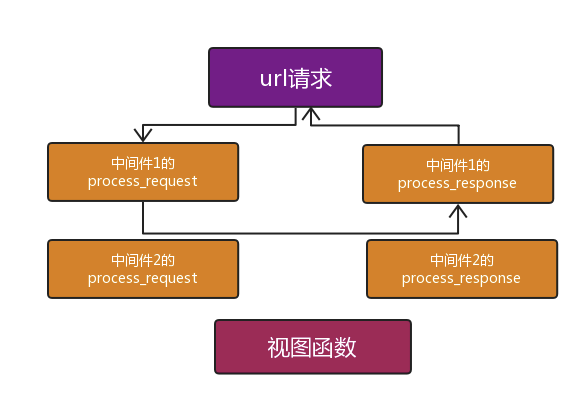

如果直接在中间件1的process_request直接return一个HTTPResponse, 那么就直接走当前中间件的process_response返回了。

参数：
* process_request：request
* process_response: request, response

<font color="red">process_response方法的返回值必须是HttpResponse对象</font>


# process_view

参数：request, callback, callback_args, callback_kwargs。 其中callback就是视图函数,view_args和view_kwargs都不包含第一个视图参数（request）。
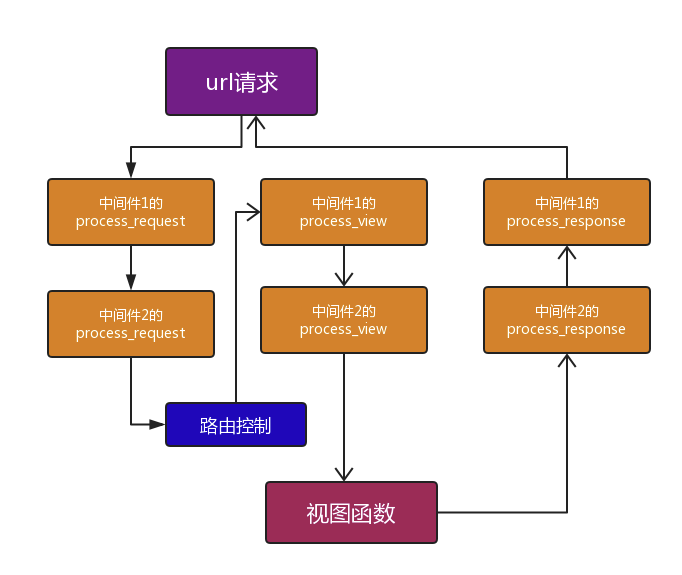


process_view应该返回None或一个HttpResponse对象。如果返回None，Django将继续处理这个请求，执行任何其他中间件的process_view方法，然后在执行相应的视图。 如果它返回一个HttpResponse对象，Django不会调用适当的视图函数。 它将执行中间件的process_response方法并将应用到该HttpResponse并返回结果。

<font color="red">注意：process_view如果有返回值，会越过其他的process_view以及视图函数，但是所有的process_response都还会执行</font>

# process_exception

参数：request, exception。其中exception是view视图函数抛出的异常对象。
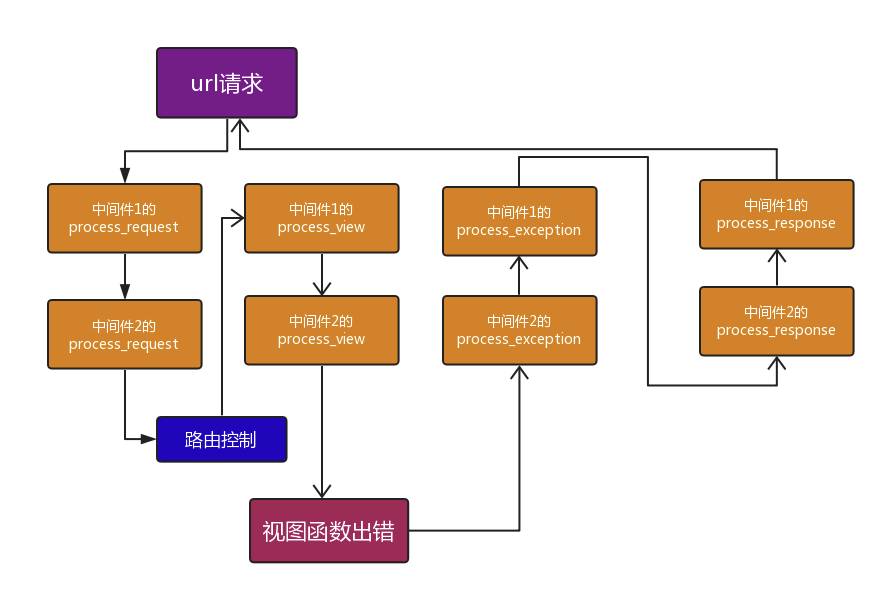

这个方法只有在视图函数中出现异常了才执行，它返回的值可以是一个None也可以是一个HttpResponse对象。如果是HttpResponse对象，Django将调用模板和中间件中的process_response方法，并返回给浏览器，否则将默认处理异常。如果返回一个None，则交给下一个中间件的process_exception方法来处理异常。它的执行顺序也是按照中间件注册顺序的倒序执行。

当某一个process_exception返回一个HTTPResponse的时候，其他的process_exception就不会走了，但是还是会从头到尾走一遍process_response.

# process_template_response

process_template_response(self, request, response)

它的参数，一个HttpRequest对象，response是TemplateResponse对象（由视图函数或者中间件产生）。

process_template_response是在视图函数执行完成后立即执行，但是它有一个前提条件，那就是视图函数返回的对象有一个render()方法（或者表明该对象是一个TemplateResponse对象或等价方法）, 当走到最后一个process_template_response的时候就会调用对象的render方法。

process_template_response是在process_view之后运行的，出现错误就会执行process_exception.

# 中间件执行流程

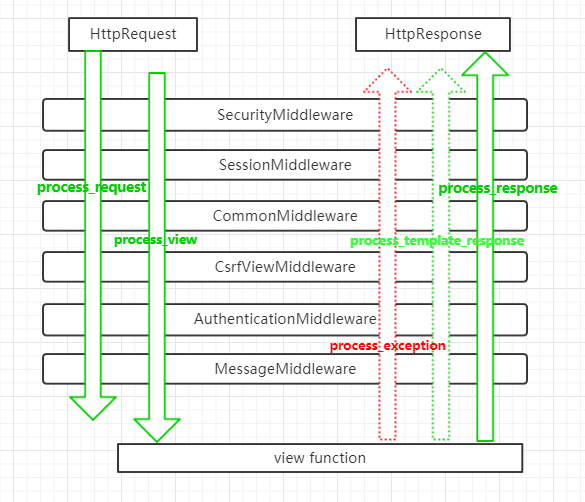

# Django请求流程

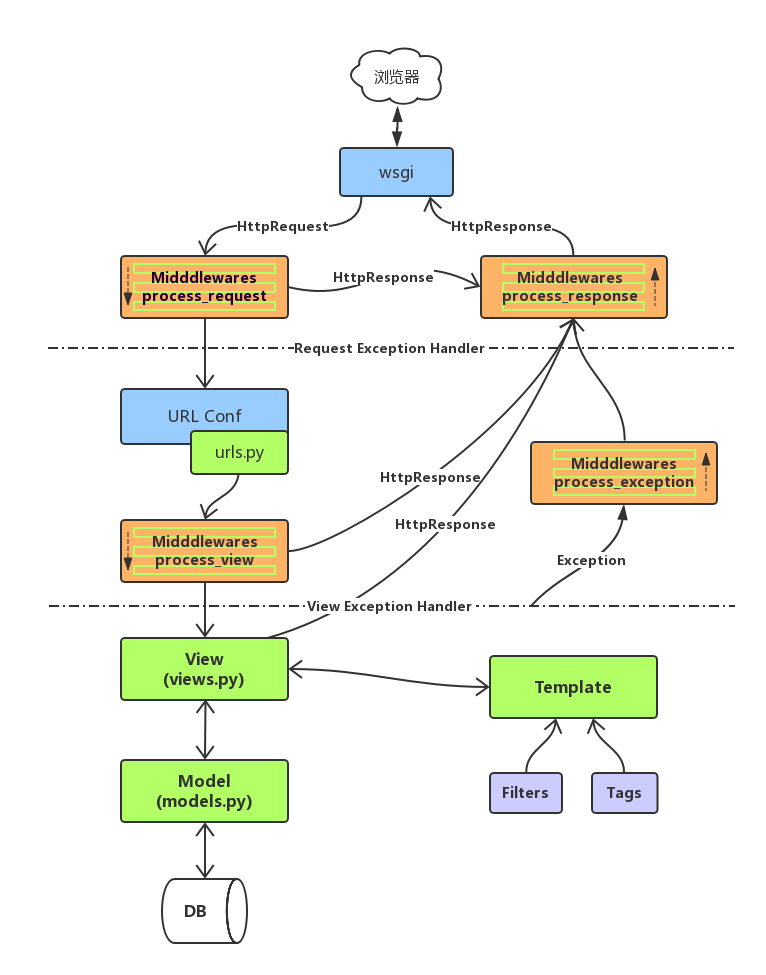